<a href="https://colab.research.google.com/github/taylan-sen/CIS490a_intro_ai/blob/main/gymnasium_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook introduces openai's ***gym***, which provides a number of physics simulation environments used for comparing agent learning algorithms. It is now maintained by **farama.org** and is called ***gymnasium***. Its official website is:

https://gymnasium.farama.org/

In order to run this environment in Google colab, Ryan Rudes has created a module called ***renderlab***. (Without this module, it is very difficult to visualize the gymnasium simulation environments in colab.)

https://github.com/ryanrudes/renderlab

In the following, we will:
* install renderlab into our colab environment
* load the MountainCar environment (which simulates a car in a valley trying to reach a flag on a hill).
* simulate a dummy agent that always runs the car in forward

In [23]:
# The line below directs the OS to install renderlab python module
# As part of installing renderlab, it should also install gymnasium
!pip install renderlab

In [24]:
import gymnasium as gym          # the new gym simulation environments
import renderlab as rl           # to play simulations as videos in colab
import numpy as np               # for fast arrays
import matplotlib.pyplot as plt  # for plotting
print('import successful')

import successful


For this assignment, we will be using the gymnasium "MountainCar" environment. Here are some details about it:

https://gymnasium.farama.org/environments/classic_control/mountain_car/

Answer the following questions in a **new** text cell placed immediately below this text cell.

**Question 1**: How many dimensions is the observation space, what does each dimension represent, is it continuous or discrete?

**Question 2**: What is the action space, is it discrete or continuous, what does each action represent?

In [43]:
# The following commands will load the gym MountainCar simulation environment,
# and will print out some information.
env_name = 'MountainCar-v0'
env = gym.make(env_name)
print('Action Space:', env.action_space)
print('Observation Space:', env.observation_space)

Action Space: Discrete(3)
Observation Space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)


The cell below has the minimal code to run a MountainCar simulation. In this code, the forward action (i.e. action = 2) is used for each step of the simulator. Note how in the while loop, env.step is called with the current action. The env.step function returns the new world state which is represented by the variable observation. If the car makes it to the flag, the loop immediately terminates. If after 200 steps the car doesn't reach the flag, it also terminates. Run the code a few times.  

In [71]:
# In this cell is some "barebones" code to run a MountainCar simulation
#   In this simulation, the car is always pushing forward

# create the simulator environment
env = gym.make("MountainCar-v0", render_mode = "rgb_array")
env = rl.RenderFrame(env, "./output")

# initialize the simulator environment, i.e. the car gets a random position
observation, info = env.reset()
print('initial car position = ', observation[0])
print('initial car velocity = ', observation[1])

step = 0
while True:
  # instead of using an agent, we set the car to always push forward
  action = 2
  observation, reward, terminated, truncated, info = env.step(action)
  step = step + 1
  if terminated or truncated:
    break

print('---------------')
print('simulation complete')
print('# steps taken = ', step)
print('final car position = ', observation[0])
print('final car velocity = ', observation[1])
print('---------------')

# generate an mp4 movie of the simulation
env.play()


initial car position =  -0.549433
initial car velocity =  0.0
---------------
simulation complete
# steps taken =  200
final car position =  -0.23415205
final car velocity =  -0.00632763
---------------
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


Answer the following questions in a **new** text cell placed immediately below this text cell.

**QUESTION 3:** Does the mountain car always start at the same position?

**QUESTION 4:** Does the car have enough power to ride all the way up the hill?

In the code below, we define a function called *dummy_agent**, which receives the mountain car's position and velocity. While the code blow is functionally equivalent to the code above, it represents how the agent can be isolated as a function with ***sensor*** input and ***action*** output. (Think of a PEAS system.) The cell below also includes some additional code to plot the car's position and velocity (as well as actions) over time.

initial car position =  -0.42507538
initial car velocity =  0.0
---------------
simulation complete
# steps taken =  88
final car position =  0.51822466
final car velocity =  0.02467637
---------------


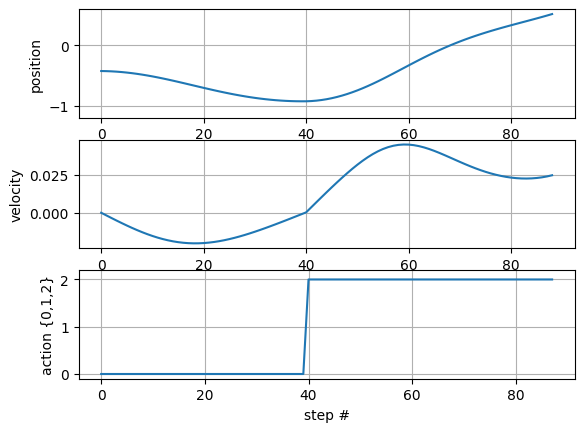

Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



t:  94%|█████████▍| 85/90 [00:00<00:00, 123.78it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file ./output/1694805052.6606488.mp4, 720000 bytes wanted but 0 bytes read,at frame 89/90, at time 2.97/2.97 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


In [59]:
# define our agent
def dummy_agent(step, position, velocity):
  """ This agent will always pick the forward action no matter what. """
  action = 2
  return action

# create the simulator environment
env = gym.make("MountainCar-v0", render_mode = "rgb_array")
env = rl.RenderFrame(env, "./output")

# initialize simulator
step = 0
observation, info = env.reset()
position_array = np.zeros([201])
velocity_array = np.zeros([201])
action_array = np.zeros([201])
position, velocity = observation  # observation is a two member array
position_array[0] = position
velocity_array[0] = velocity
print('initial car position = ', position)
print('initial car velocity = ', velocity)

while True:
  action = dummy_agent(step, position, velocity)
  action_array[step] = action
  #print('step:', step, 'action:', action)
  observation, reward, terminated, truncated, info = env.step(action)
  step += 1
  #print('  observation:', observation)
  position, velocity = observation
  position_array[step] = position
  velocity_array[step] = velocity

  if terminated or truncated:
    break

print('---------------')
print('simulation complete')
print('# steps taken = ', step)
print('final car position = ', observation[0])
print('final car velocity = ', observation[1])
print('---------------')

# plot position, velocity, and actions
plt.subplot(311)
plt.plot(position_array[0:step+1])
plt.grid(True)
plt.ylim(-1.2, .6)
plt.ylabel('position')
plt.subplot(312)
plt.plot(velocity_array[0:step+1])
plt.grid(True)
plt.ylabel('velocity')
plt.subplot(313)
plt.plot(action_array[0:step])
plt.grid(True)
plt.ylabel('action {0,1,2}')
plt.xlabel('step #')
plt.ylim(-0.1,2.2)
plt.show()

# create video
env.play()

In the code below, we have an updated agent. While the agent below still does not use the sensors (i.e. is running *open loop*), it does change its behavior based on time (represented as the number of steps that have gone by). Note that when the car reaches the flag, the number of steps taken is less than 200.

---------------
simulation complete
# steps taken =  200
final car position =  -0.09089441
final car velocity =  -0.025820384
---------------


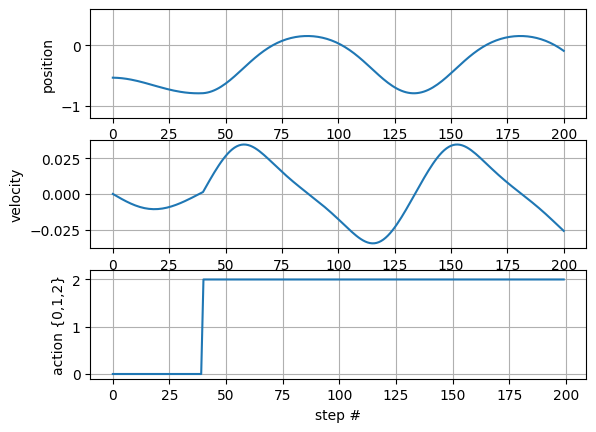

Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


In [69]:
def agent(step, position, velocity):
  """This agent will go a fixed number of steps reverse, then go forward.
  This is an open loop agent, since there is no feedback loop. In other
  words, the agent is not using the sensor position or velocity at all."""
  num_steps_reverse = 40
  if step < num_steps_reverse:
    action = 0
  else:
    action = 2
  return action

env = gym.make("MountainCar-v0", render_mode = "rgb_array")
env = rl.RenderFrame(env, "./output")

step = 0
observation, info = env.reset()
position_array = np.zeros([201])
velocity_array = np.zeros([201])
action_array = np.zeros([201])

position_array[0] = observation[0]
velocity_array[0] = observation[1]

while True:
  #action = env.action_space.sample()
  action = agent(step, observation[0], observation[1])
  action_array[step] = action
  #print('step:', step, 'action:', action)
  observation, reward, terminated, truncated, info = env.step(action)
  step += 1
  #print('  observation:', observation)
  position_array[step] = observation[0]
  velocity_array[step] = observation[1]
  if terminated or truncated:
    break


print('---------------')
print('simulation complete')
print('# steps taken = ', step)
print('final car position = ', observation[0])
print('final car velocity = ', observation[1])
print('---------------')

# plot position, velocity, and actions
plt.subplot(311)
plt.plot(position_array[0:step+1])
plt.grid(True)
plt.ylim(-1.2, .6)
plt.ylabel('position')
plt.subplot(312)
plt.plot(velocity_array[0:step+1])
plt.grid(True)
plt.ylabel('velocity')
plt.subplot(313)
plt.plot(action_array[0:step])
plt.grid(True)
plt.ylabel('action {0,1,2}')
plt.xlabel('step #')
plt.ylim(-0.1,2.2)
plt.show()

# create video
env.play()

Answer the following questions in a **new** text cell placed immediately below this text cell.

**QUESTION 5:** How many steps does the simulation run?

**QUESTION 6:** How can you modify the agent to reach the flag faster?

In the cell below, we have a new unfinished agent, ***smart_agent*** which should pick the action based upon the observed velocity. Complete the code in the cell below for teh smart_agent function and ensure it runs correctly.

---------------
simulation complete
# steps taken =  200
final car position =  -0.2769088
final car velocity =  -0.006356386
---------------


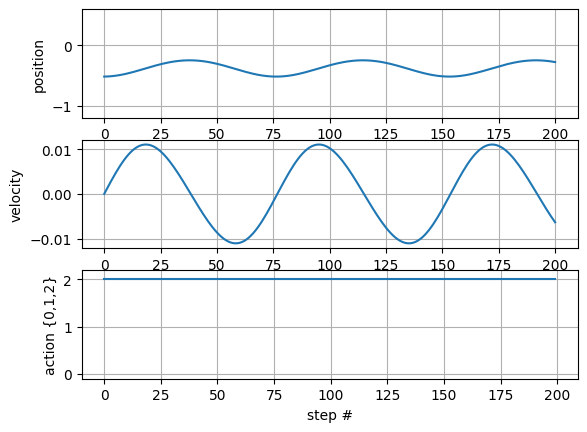

Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


In [70]:
def smart_agent(step, position, velocity):
  """This agent will pick the forward action when velocity is positive and
  will pick the reverse action when the velocity is not positive."""

  # insert code below to propertly set action; HINT: use if statements

  return action

env = gym.make("MountainCar-v0", render_mode = "rgb_array")
env = rl.RenderFrame(env, "./output")

step = 0
observation, info = env.reset()
position_array = np.zeros([201])
velocity_array = np.zeros([201])
action_array = np.zeros([201])

position_array[0] = observation[0]
velocity_array[0] = observation[1]

while True:
  action = smart_agent(step, observation[0], observation[1])
  action_array[step] = action
  #print('step:', step, 'action:', action)
  observation, reward, terminated, truncated, info = env.step(action)
  step += 1
  #print('  observation:', observation)
  position_array[step] = observation[0]
  velocity_array[step] = observation[1]
  if terminated or truncated:
    break


print('---------------')
print('simulation complete')
print('# steps taken = ', step)
print('final car position = ', observation[0])
print('final car velocity = ', observation[1])
print('---------------')

# plot position, velocity, and actions
plt.subplot(311)
plt.plot(position_array[0:step+1])
plt.grid(True)
plt.ylim(-1.2, .6)
plt.ylabel('position')
plt.subplot(312)
plt.plot(velocity_array[0:step+1])
plt.grid(True)
plt.ylabel('velocity')
plt.subplot(313)
plt.plot(action_array[0:step])
plt.grid(True)
plt.ylabel('action {0,1,2}')
plt.xlabel('step #')
plt.ylim(-0.1,2.2)
plt.show()

# create video
env.play()

Answer the following questions in a **new** text cell placed immediately below this text cell.

**QUESTION 7:** Does the mountain car usually make it to the flag with your completed smart_agent?

**QUESTION 8:** How does the performance of your smart_agent compare to the open loop agent in terms of steps needed to reach the flag? When considering performance, you should run each agent several times to see how it behaves with different mountain car starting positions.